### Comments
***This problem can be solved using heaps***

* The approach was to exploit the fact that only the min of the multiplier can be used so that could reduce our addition set.

eg: scores: [1, 3, 3, 2], multiplier:[2, 1, 3, 4] k =3

* if we take the multipliers and get a sorted heapified version we get: [4,3,2,1]
* Since we want the k elements top score we can eliminate the top (k -1) as they cant be used as we are going for the min.

[4,3,2,1] -> [2,1]

* Next we add in our score elements into a heap to keep the largest k-1 elements  

MaxHeap -> [2,3]

* Then we start to generate the score for all remaining elements on the:


| Multiper Heap  | Score Heap | Score |
| :---------------- | :------: | ----: |
| [2,1]        |   [2,3]   | 0 |
| [1]           |   [1,2,3]   |12 |
| []     | [1,2,3,3]  | 8 |

Max Score = 12



* Sadly for this one I had to look for at the reference as after an hour of trying. This is as close to the solution as I got. It was still getting timelimit exceeded.

```
import heapq


class Solution:
    def maxScore(self, nums1: list[int], nums2: list[int], k: int) -> int:
        hp = []
        for i in range(len(nums2)):
            heapq.heappush(hp, (-nums2[i], i))

        maxScore = 0
        maxHeap = []
        for i in range(k - 1):
            hpEle = heapq.heappop(hp)
            heapq.heappush(maxHeap, nums1[hpEle[1]])

        for _ in range(len(hp)):
            hpEle = heapq.heappop(hp)

            score = nums1[hpEle[1]]
            score += sum(maxHeap)
            score *= -hpEle[0]
            heapq.heappushpop(maxHeap, nums1[hpEle[1]])
            if maxScore < score:
                maxScore = score

        return maxScore
```

* Solution lied in keeping the current sum and push poping away from it rather than recalculating it.

### Complexity:

***Time***: O(nlog(n))
* The inital sort is nlog(n)
* With the rest of the iteration being n.

***Space***: O(n+k)
* N for the heap with 2n elements
* k for the heap of max elements. 

In [ ]:
import heapq


class Solution:
    def maxScore(self, nums1: list[int], nums2: list[int], k: int) -> int:
        hp = []
        for i in range(len(nums2)):
            heapq.heappush(hp, (-nums2[i], nums1[i]))

        maxScore = 0
        maxHeap = []
        for i in range(k - 1):
            hpEle = heapq.heappop(hp)
            heapq.heappush(maxHeap, hpEle[1])

        currentSum = sum(maxHeap)

        for _ in range(len(hp)):
            hpEle = heapq.heappop(hp)

            score = hpEle[1]
            score += currentSum
            score *= -hpEle[0]

            currentSum += hpEle[1] - heapq.heappushpop(maxHeap, hpEle[1])

            if maxScore < score:
                maxScore = score

        return maxScore


s = Solution()

# Example 1:

# Input: nums1 = [1,3,3,2], nums2 = [2,1,3,4], k = 3
# Output: 12
# Explanation:
# The four possible subsequence scores are:
# - We choose the indices 0, 1, and 2 with score = (1+3+3) * min(2,1,3) = 7.
# - We choose the indices 0, 1, and 3 with score = (1+3+2) * min(2,1,4) = 6.
# - We choose the indices 0, 2, and 3 with score = (1+3+2) * min(2,3,4) = 12.
# - We choose the indices 1, 2, and 3 with score = (3+3+2) * min(1,3,4) = 8.
# Therefore, we return the max score, which is 12.
print(s.maxScore([1, 3, 3, 2], [2, 1, 3, 4], 3))


# Example 2:

# Input: nums1 = [4,2,3,1,1], nums2 = [7,5,10,9,6], k = 1
# Output: 30
# Explanation:
# Choosing index 2 is optimal: nums1[2] * nums2[2] = 3 * 10 = 30 is the maximum possible score.
# print(s.maxScore([4, 2, 3, 1, 1], [7, 5, 10, 9, 6], 1))

# 168
print(s.maxScore([2, 1, 14, 12], [11, 7, 13, 6], 3))

# 1121
print(s.maxScore([23, 16, 20, 7, 3], [19, 21, 22, 22, 12], 3))

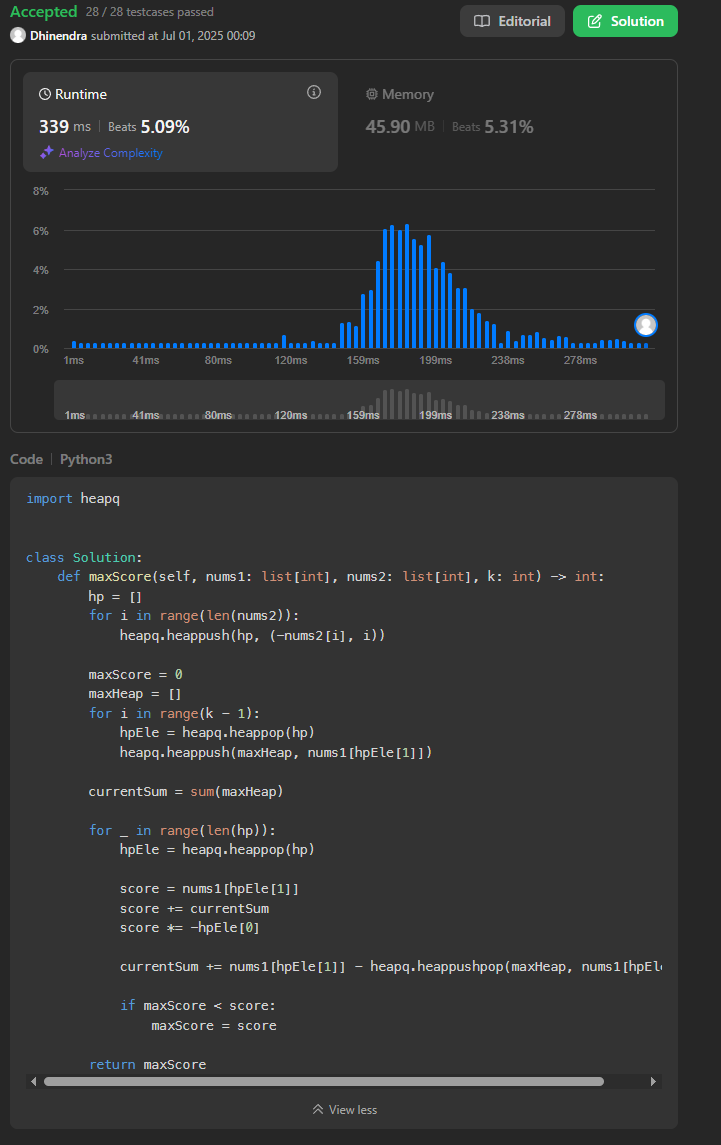

Had another go at this.

This time around a bit better.



```
import heapq


class Solution:
    def maxScore(self, nums1: list[int], nums2: list[int], k: int) -> int:
        hp = []
        total = 0
        ans = 0

        n2 = [(v, i) for i, v in enumerate(nums2)]

        n2.sort(key=lambda a: a[0])

        for _ in range(k - 1):
            ele = n2.pop()
            total += nums1[ele[1]]
            heapq.heappush(hp, nums1[ele[1]])

        for _ in range(len(n2)):
            ele = n2.pop()
            total+= nums1[ele[1]]
            new_ans = total * ele[0]
            
            ans = new_ans if ans < new_ans else ans

            total -= heapq.heappushpop(hp, nums1[ele[1]])
            
            

        return ans

```
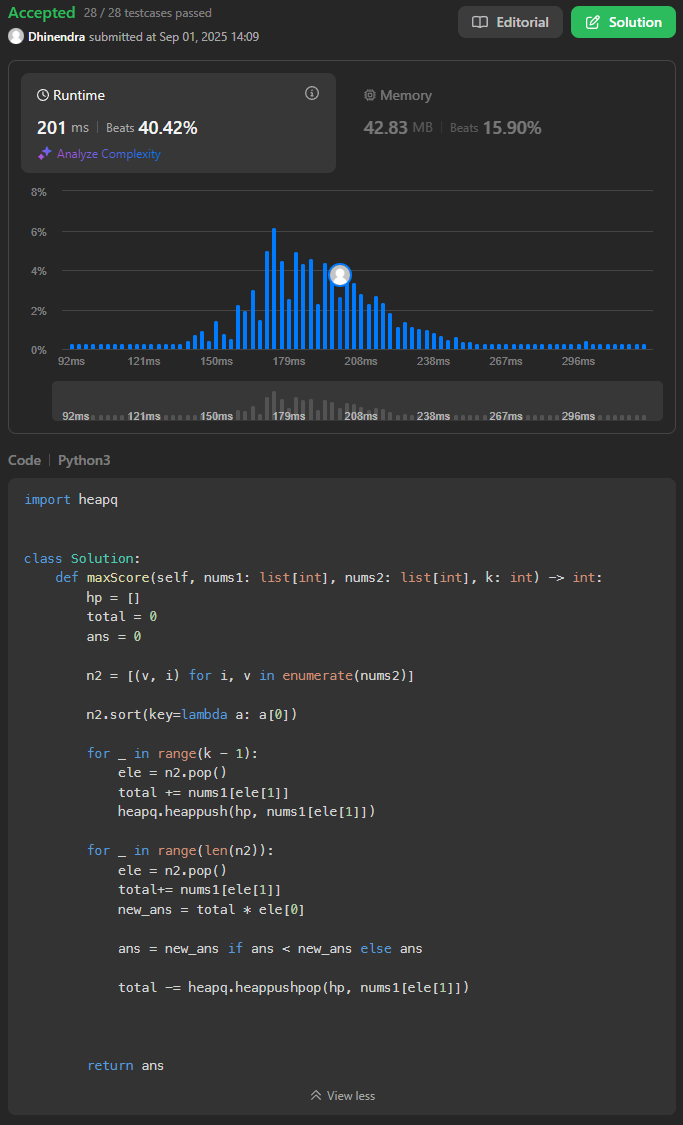

Still too longer than 20min :)